# ✨ Apresentação

 Curso : Machine Learning


 Aluna: Camila Perazzo

Atividade de implementação de modelos e verificação de eficiência da estratégia adotada em problemas de regressão e classificação - 23/05/2023. 

Este conjunto de dados contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para novos veículos leves para venda no varejo no Canadá.

* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# 🎲 Coleta e Preparação 

In [567]:
#Preparando o Ambiente
import pandas as pd   

#Importando o arquivo de dados 
df = pd.read_csv('/content/FuelConsumptionCo2.csv')

# Identifica os tipos de dados
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [568]:
#Verificando o formato do conjunto de dados 
print("Shape do conjunto de dados: ",df.shape)

Shape do conjunto de dados:  (1067, 13)


In [569]:
#Visualizando amostra do conjunto de dados
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


# 🎲 Exiba a Matriz de Correlação entre as Variáveis

In [570]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

<ipython-input-571-1a5a6818485c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_subset.corr()


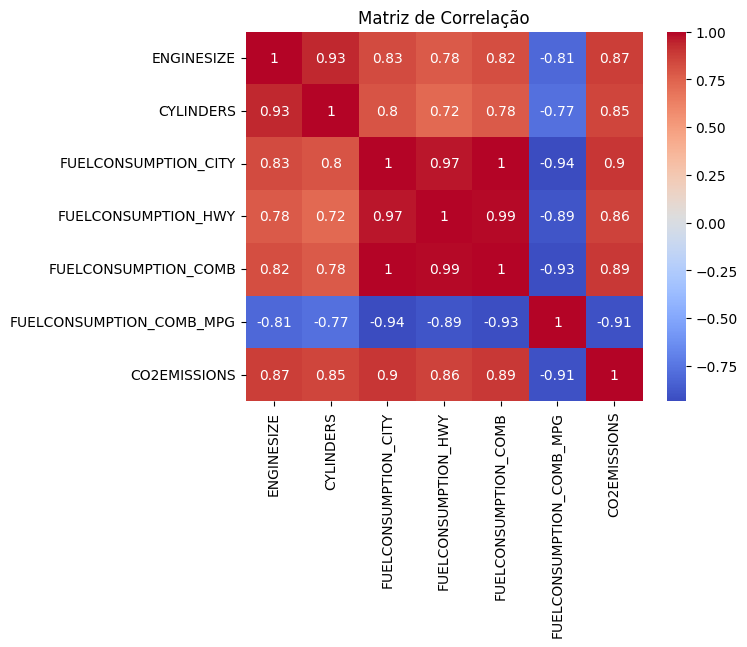

In [571]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas relevantes (excluindo a primeira coluna)
df_subset = df.iloc[:, 1:]

# Calcular a matriz de correlação
correlation_matrix = df_subset.corr()

# Exibir matriz de correlação com heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [572]:
# Matrix de Correlação (Pearson)
corr = df.iloc[:, 1:].corr() 
display(corr.style.background_gradient(cmap='BuGn').set_precision(2))


<ipython-input-572-06651845d749>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.iloc[:, 1:].corr()
<ipython-input-572-06651845d749>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(corr.style.background_gradient(cmap='BuGn').set_precision(2))


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.00,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,0.93,1.00,0.80,0.72,0.78,-0.77,0.85
FUELCONSUMPTION_CITY,0.83,0.80,1.00,0.97,1.00,-0.94,0.90
FUELCONSUMPTION_HWY,0.78,0.72,0.97,1.00,0.99,-0.89,0.86
FUELCONSUMPTION_COMB,0.82,0.78,1.00,0.99,1.00,-0.93,0.89
FUELCONSUMPTION_COMB_MPG,-0.81,-0.77,-0.94,-0.89,-0.93,1.00,-0.91
CO2EMISSIONS,0.87,0.85,0.90,0.86,0.89,-0.91,1.00


# 🎲 Atualize os nomes das colunas

In [573]:
df.rename(columns={'FUELCONSUMPTION_CITY': 'FUELCONSCITY'}, inplace=True)

df.rename(columns={'FUELCONSUMPTION_HWY': 'FUELCONSHWY'}, inplace=True)

df.rename(columns={'FUELCONSUMPTION_COMB': 'FUELCONSCOMB'}, inplace=True)

df.rename(columns={'FUELCONSUMPTION_COMB_MPG': 'FUELCONSCOMBMPG'}, inplace=True)


In [574]:
# Matrix de Correlação (Pearson)
corr = df.iloc[:, 1:].corr() 
display(corr.style.background_gradient(cmap='BuGn').set_precision(2))

<ipython-input-574-06651845d749>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.iloc[:, 1:].corr()
<ipython-input-574-06651845d749>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(corr.style.background_gradient(cmap='BuGn').set_precision(2))


,ENGINESIZE,CYLINDERS,FUELCONSCITY,FUELCONSHWY,FUELCONSCOMB,FUELCONSCOMBMPG,CO2EMISSIONS
ENGINESIZE,1.00,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,0.93,1.00,0.80,0.72,0.78,-0.77,0.85
FUELCONSCITY,0.83,0.80,1.00,0.97,1.00,-0.94,0.90
FUELCONSHWY,0.78,0.72,0.97,1.00,0.99,-0.89,0.86
FUELCONSCOMB,0.82,0.78,1.00,0.99,1.00,-0.93,0.89
FUELCONSCOMBMPG,-0.81,-0.77,-0.94,-0.89,-0.93,1.00,-0.91
CO2EMISSIONS,0.87,0.85,0.90,0.86,0.89,-0.91,1.00


# 🎲 Crie um novo dataframe

In [575]:
# Criar novo DataFrame com as colunas desejadas
cdf = df.loc[:, ['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB', 'CO2EMISSIONS']].copy()
cdf.head(10)


,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [576]:
cdf.shape

(1067, 4)

# 🎲 Faça as seguintes análises

4.1. Separe os dados de treino e teste

In [577]:
# bibliotecas utilizadas
import numpy as np
import warnings
import os

# O Scikit-learn é uma biblioteca popular em Python para aprendizado de máquina e inclui o conjunto de dados Iris
from sklearn.linear_model import LogisticRegression

In [578]:
# Separando os dados de treino e teste
msk = np.random.rand(len(df)) < 0.80
dfTrain = cdf[msk]
dfTest = cdf[~msk]

In [579]:
print('Dataset de Treino = ', dfTrain.shape)
print('Dataset de Test   = ', dfTest.shape)

Dataset de Treino =  (878, 4)
Dataset de Test   =  (189, 4)


4.2. Import sklearn library

In [580]:
# Import sklearn library
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


4.3. Crie a variável com o modelo de Regressão Linear

In [581]:
# Linear Regression Model
regr = linear_model.LinearRegression()

4.4. Separe os dados de treino e teste

In [582]:
test_x_e = np.asanyarray(dfTest[['ENGINESIZE']])
test_x_c = np.asanyarray(dfTest[['CYLINDERS']])
test_x_f = np.asanyarray(dfTest[['FUELCONSCOMB']])

test_y = np.asanyarray(dfTest[['CO2EMISSIONS']])

4.5. Separe as Features de Treino e Teste

In [583]:
# Training X values (Variáveis independentes - Explanatory) e Y (Variável dependente - Target)
train_x_e = np.asanyarray(dfTrain[['ENGINESIZE']])
train_x_c = np.asanyarray(dfTrain[['CYLINDERS']])
train_x_f = np.asanyarray(dfTrain[['FUELCONSCOMB']])

train_y = np.asanyarray(dfTrain[['CO2EMISSIONS']])


4.6. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente

In [584]:
# Ajuste da reta
regr.fit(train_x_e, train_y)
# Defining the values for coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.2397057]]
Intercept:  [124.9043427]


In [585]:
# Ajuste da reta
regr.fit(train_x_c, train_y)
# Defining the values for coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[30.10877116]]
Intercept:  [81.60362912]


In [586]:
# Ajuste da reta
regr.fit(train_x_f, train_y)
# Defining the values for coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[15.89356536]]
Intercept:  [71.23987146]


4.7. Plot o Gráfico de Regressão Linear com a Reta Ajustada

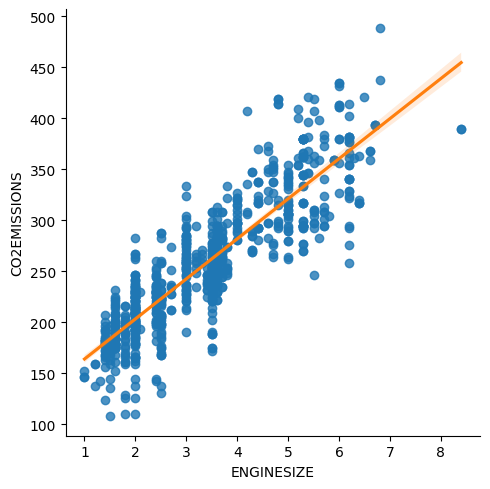

In [587]:
sns.lmplot(x='ENGINESIZE', y='CO2EMISSIONS', line_kws={"color": "C1"}, data=dfTrain)

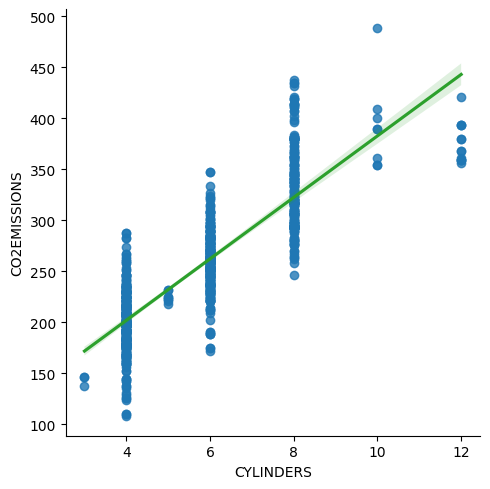

In [588]:
sns.lmplot(x='CYLINDERS', y='CO2EMISSIONS', line_kws={"color": "C2"}, data=dfTrain)

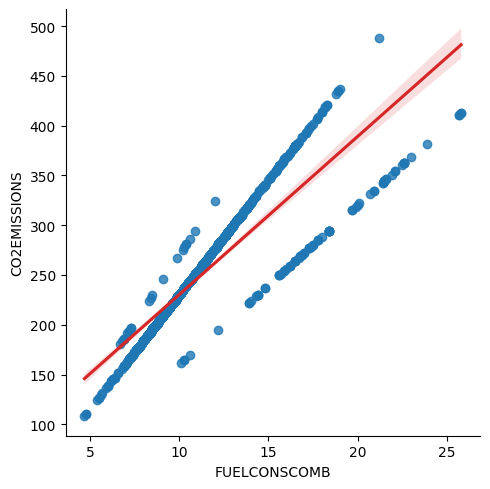

In [589]:
sns.lmplot(x='FUELCONSCOMB', y='CO2EMISSIONS', line_kws={"color": "C3"}, data=dfTrain)

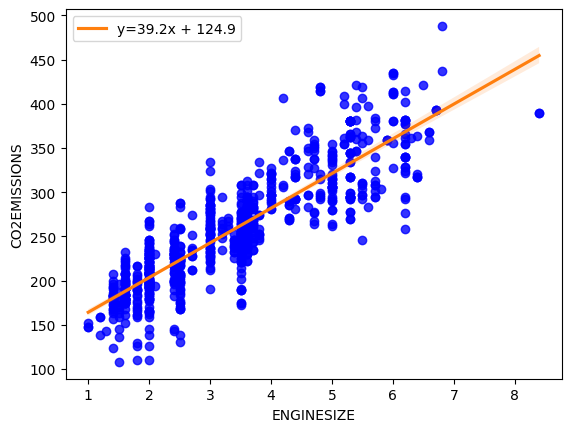

In [590]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfTrain['ENGINESIZE'],dfTrain['CO2EMISSIONS'])

ax = sns.regplot(x="ENGINESIZE", 
                 y="CO2EMISSIONS", 
                 data=dfTrain, color='b',
                 line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept),"color": "C1"})

ax.legend()

plt.show()

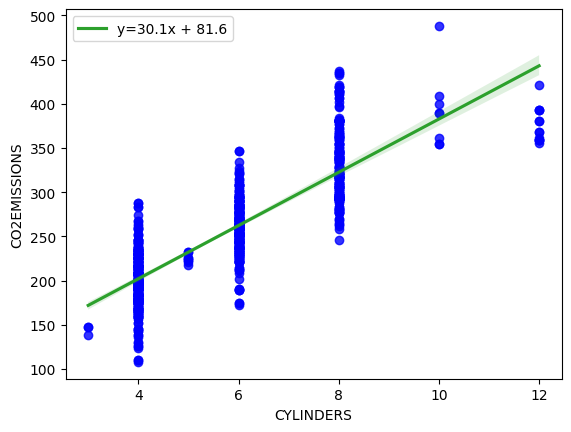

In [591]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfTrain['CYLINDERS'],dfTrain['CO2EMISSIONS'])

ax = sns.regplot(x="CYLINDERS", 
                 y="CO2EMISSIONS", 
                 data=dfTrain, color='b',
                 line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept),"color": "C2"})

ax.legend()

plt.show()

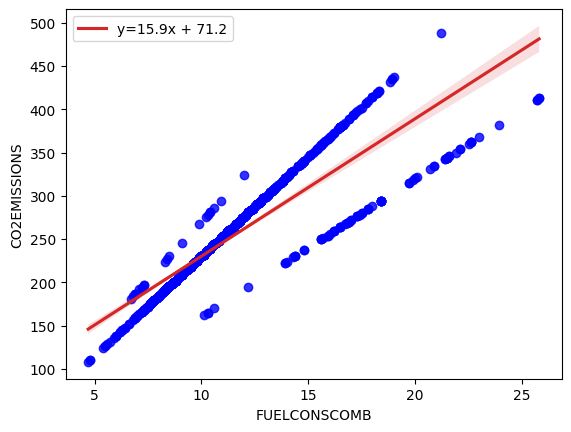

In [592]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfTrain['FUELCONSCOMB'],dfTrain['CO2EMISSIONS'])

ax = sns.regplot(x="FUELCONSCOMB", 
                 y="CO2EMISSIONS", 
                 data=dfTrain, color='b',
                 line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept),"color": "C3"})

ax.legend()

plt.show()

4.8. Encontre o R2-Score

In [593]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Combinações de variáveis
combinations = [('FUELCONSCOMB',), ('CYLINDERS',), ('ENGINESIZE',)]

best_r2_score = 0
best_variable_combination = None

for combination in combinations:
    # Separar as variáveis independentes (X) e a variável dependente (y)
    X = df[list(combination)]
    y = df['CO2EMISSIONS']
    
    # Separar os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criar o modelo de Regressão Linear
    regression_model = LinearRegression()
    
    # Treinar o modelo usando o conjunto de treinamento
    regression_model.fit(X_train, y_train)
    
    # Calcular o R2-Score
    r2_score = regression_model.score(X_test, y_test)
    
    print("Variáveis:", combination)
    print("R2-Score:", r2_score)

Variáveis: ('FUELCONSCOMB',)
R2-Score: 0.8071474868274242
Variáveis: ('CYLINDERS',)
R2-Score: 0.7317140029783895
Variáveis: ('ENGINESIZE',)
R2-Score: 0.7615595731934373


# 🎲 Encontre o Melhor ajuste (R2-Score) 

Entre as seguintes combinações de variáveis:
 
* FUELCONSCOMB & CO2EMISSIONS
* CYLINDERS & CO2EMISSIONS
* ENGINESIZE & CO2EMISSIONS

In [594]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Lista das combinações de variáveis
combinations_pair = [('FUELCONSCOMB', 'CO2EMISSIONS'),
               ('CYLINDERS', 'CO2EMISSIONS'),
               ('ENGINESIZE', 'CO2EMISSIONS')]

best_r2_score = -1  # Inicialização do melhor R2-Score

for feature, target in combinations_pair:
    # Separe os dados de treino e teste
    train_cdf, test_cdf = train_test_split(cdf, test_size=0.2, random_state=42)
    
    # Crie a variável com o modelo de Regressão Linear
    model = LinearRegression()
    
    # Separe as Features de Treino e Teste
    train_x = train_cdf[[feature]]
    train_y = train_cdf[target]
    test_x = test_cdf[[feature]]
    test_y = test_cdf[target]
    
    # Rode o Modelo
    model.fit(train_x, train_y)
    
    # Encontre o R2-Score
    y_pred = model.predict(test_x)
    r2 = r2_score(test_y, y_pred)
    
    if r2 > best_r2_score:
        best_r2_score = r2
        best_feature = feature
        best_target = target

print("Melhor ajuste:")
print("Variável de Feature:", best_feature)
print("Variável de Target:", best_target)
print("Melhor R2-Score:", best_r2_score)


Melhor ajuste:
Variável de Feature: FUELCONSCOMB
Variável de Target: CO2EMISSIONS
Melhor R2-Score: 0.8071474868274242


# 🎲 Regressão Linear Múltipla

Usando as variáveis:

* ENGINESIZE
* CYLINDERS
* FUELCONSCOMB

In [595]:
# Import sklearn library
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Linear Regression Model
regr = linear_model.LinearRegression()

# Training X values (Var Independent - Explanatory)  e Y (Var Dependent - Target)
train_x = np.asanyarray(dfTrain[['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB']])
train_y = np.asanyarray(dfTrain[['CO2EMISSIONS']])

# Performing Line Adjustment
regr.fit(train_x, train_y)

# Defining the values for coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[11.43455109  7.3905759   9.28830002]]
Intercept:  [67.05954605]
